In [1]:
import umap.umap_ as UMAP 
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
type(X)

numpy.ndarray

In [6]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
#1 UMAP

In [7]:
# Apply UMAP to reduce the dimensionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)


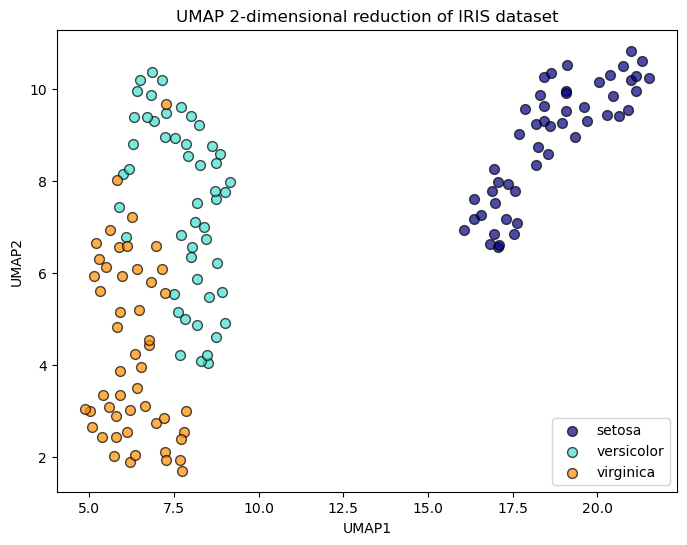

In [11]:
# Plot the UMAP-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_umap[y == i, 0], X_umap[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('UMAP 2-dimensional reduction of IRIS dataset',)
plt.xlabel("UMAP1",)
plt.ylabel("UMAP2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [ ]:
#2 t-SNE

In [12]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

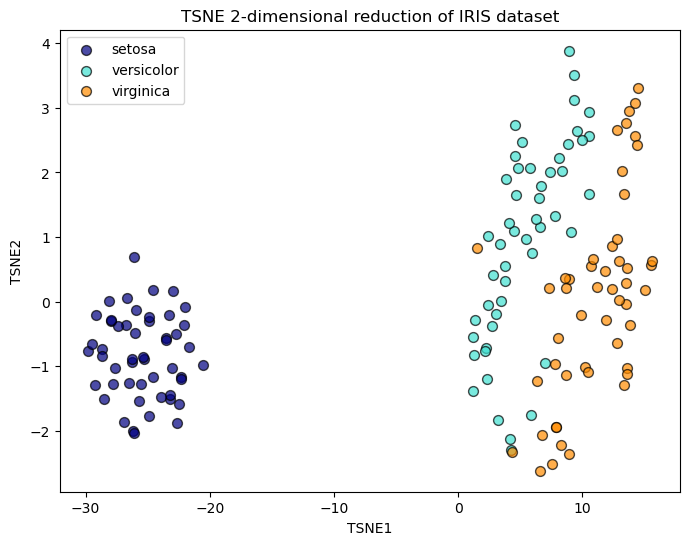

In [14]:
# Plot the TSNE-transformed data in 2D

plt.figure(figsize=(8,6))

plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('TSNE 2-dimensional reduction of IRIS dataset',)
plt.xlabel("TSNE1",)
plt.ylabel("TSNE2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

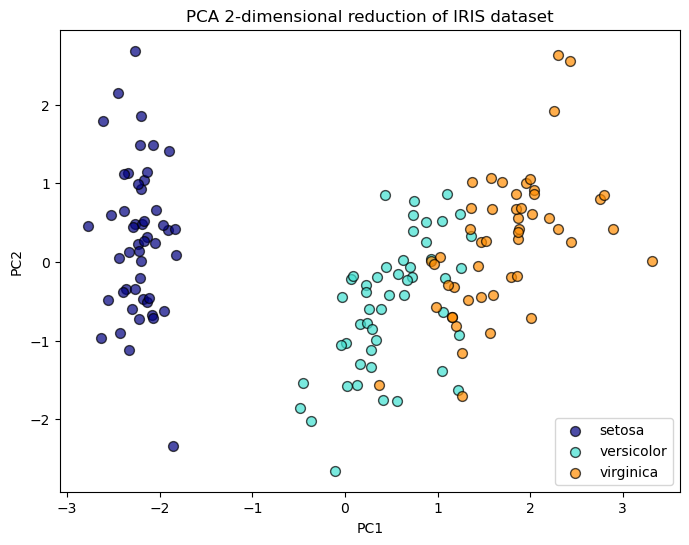

In [17]:
# 3 Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

C:\Users\alber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


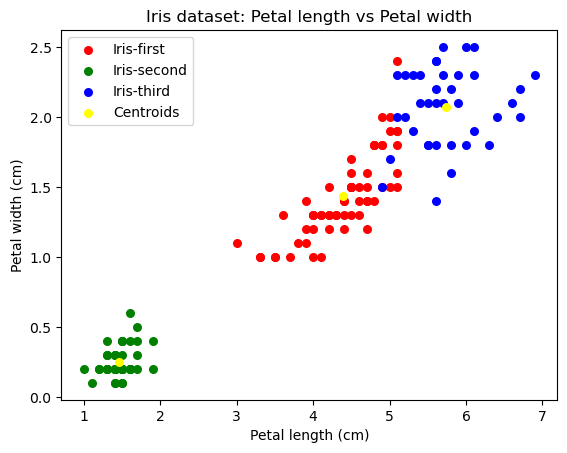

In [39]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 30, c = 'red', label = 'Iris-first')

plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 30, c = 'green', label = 'Iris-second')

plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 30, c = 'blue', label = 'Iris-third')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 30, c = 'yellow', label = 'Centroids')

# Showing the results of the plot
label = 'Centroids'
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris dataset: Petal length vs Petal width')
plt.legend()
plt.show()

In [1]:
# original dataset not easily separated across 2 dimensions (petal width against petal length)
# PCA, TSNE, and UMAP techniques allow results in feature engineering that allows classification labels 
# to be applied more easily on the dataset.
# TODO: compare the techniques and determine which is best when applied to this dataset